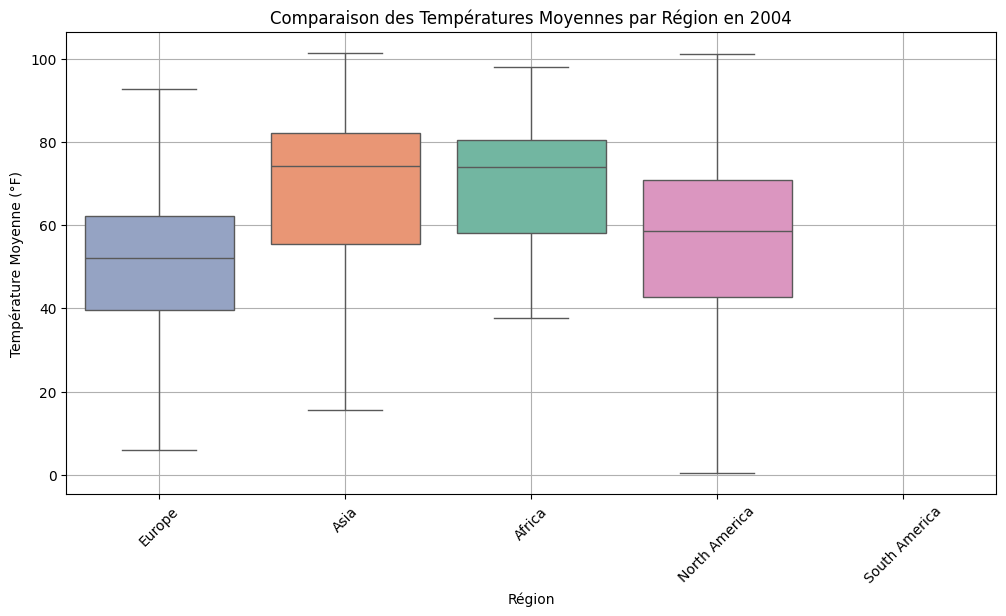

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données en spécifiant les types de données des colonnes
# Assumons que la colonne "AvgTemperature" est numérique et "Region" est une catégorie
df = pd.read_csv("../city_temperature.csv", sep=",", dtype={"AvgTemperature": float, "Region": str}, low_memory=False)

# Nettoyer les noms de colonnes pour éviter les erreurs dues aux espaces
df.columns = df.columns.str.strip()

# Sélectionner cinq régions différentes
regions = ["Europe", "Asia", "Africa", "North America", "South America"]  # Remplacer par les noms réels des régions

# Filtrer les données pour ces régions
df_regions = df[df["Region"].isin(regions)]

# Vérifier s'il y a des données pour ces régions
if df_regions.empty:
    print("Aucune donnée trouvée pour les régions sélectionnées. Vérifie les valeurs dans le fichier.")
else:
    # Calculer la température moyenne par région pour une année donnée (par exemple 2004)
    annee = 2004
    df_annee = df_regions[df_regions["Year"] == annee]

    # Vérifier si des données existent après le filtrage
    if df_annee.empty:
        print(f"Aucune donnée trouvée pour l'année {annee}. Vérifie les valeurs dans le fichier.")
    else:
        # Tracer un boxplot des températures pour chaque région
        plt.figure(figsize=(12, 6))
        sns.boxplot(x="Region", y="AvgTemperature", data=df_annee, order=regions, hue="Region", palette="Set2", showfliers=False)

        # Personnalisation du graphique
        plt.title(f"Comparaison des Températures Moyennes par Région en {annee}")
        plt.xlabel("Région")
        plt.ylabel("Température Moyenne (°F)")
        plt.xticks(rotation=45)
        plt.grid(True)

        # Affichage
        plt.show()


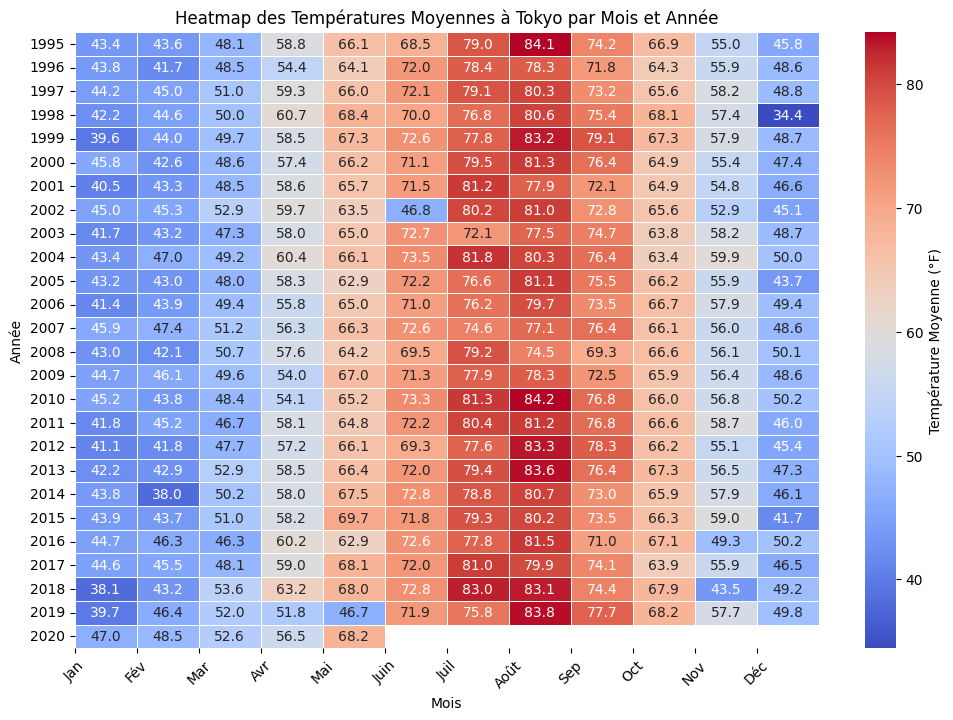

In [3]:
# Sélectionner la ville et filtrer les données (exemple: Tokyo)
ville = "Tokyo"
df_ville = df[df["City"] == ville]

# Vérifier s'il y a des données après filtrage
if df_ville.empty:
    print(f"Aucune donnée trouvée pour {ville}. Vérifie les valeurs dans le fichier.")
else:
    # Calculer les moyennes mensuelles des températures pour chaque année
    df_ville_monthly = df_ville.groupby(["Year", "Month"])["AvgTemperature"].mean().unstack()

    # Tracer la heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df_ville_monthly, cmap="coolwarm", annot=True, fmt=".1f", cbar_kws={'label': 'Température Moyenne (°F)'}, linewidths=0.5)

    # Personnalisation du graphique
    plt.title(f"Heatmap des Températures Moyennes à {ville} par Mois et Année")
    plt.xlabel("Mois")
    plt.ylabel("Année")
    plt.xticks(ticks=range(12), labels=["Jan", "Fév", "Mar", "Avr", "Mai", "Juin", "Juil", "Août", "Sep", "Oct", "Nov", "Déc"], rotation=45)
    plt.yticks(rotation=0)
    
    # Affichage
    plt.show()